# Survival Prediction After Thoracic Surgeries

[Link to Dataset](https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data)  
[Link to Relevant Research Paper](https://www.sciencedirect.com/science/article/abs/pii/S1568494613002627)

## Table of Contents  
1. [The Problem](#S1)<br>
    1.1 [Problem Definition](#1.1)<br>
    1.2 [Proposed Solutions](#1.2)<br>
    1.3 [Capacities Required](#1.3)<br>
2. [The Data Exploration](#S2)<br>
    2.1 [Continuous Features Data Quality Report](#2.1)<br>
    2.2 [Categorical Features Data Quality Report](#2.2)<br>
    2.3 [Visualisations](#2.3)<br>
    2.4 [Data Quality Plan](#2.4)<br>
    2.5 [Handling Strategies for the Data Quality Issues](#2.5)<br>
3. [The Evaluation](#S3)<br>
    3.1 [Types of Experiments](#3.1)<br>
    3.2 [Relevant Metrics](#3.2)<br>

## <a name="S1"></a>Section 1: The Problem 

### <a name="1.1"></a>1.1 Problem Definition

Lung cancer is a malignant lung tumor characterized by uncontrolled cell growth in tissues of the lung. It is the most common cause of cancer death in Ireland, with 1,693 deaths in 2010[[1]](#C1). It also has one of the lowest five-year cancer survival rates in the UK[[2]](#C1). Researchers and healthcare providers working towards improving care and survival rates for lung cancer patients globally.  
  
Available treatments include surgery, chemotherapy, radiation therapy, immunotherapy, and targeted therapy, with each of them having their own benefits and risks. In case of surgery, it could be effective at removing a large volume of tumour accessible to the sergeant, but it comes of risks of complications, damage to nearby normal tissues, and the basic requirement for patient to be able to tolerate the surgery and anesthesia. The healthcare providers currently suggest treatment plans depending on the type of lung cancer, size, how advance it is, and the patient's overall health.

### <a name="1.2"></a>1.2 Proposed Solutions

#### Prposal 1: Surgery Prediction
A model could be built to predict the likelihood that a patient will survive for more than 1 year after the surgery has been performed. This model could be used to assign every surgery a 1 year survival likelihood, and those that are most likely to lead to death within 1 year could be flagged for the healthcare providers to pay closer attention during postoperative recovery and follow-up appointments. In this way the healthcare providers can get ahead of detereorations, or be informed to react to detereorations as quickly as possible, for those who are at higher risks of dying within a year of surgery.

#### Proposal 2: Treatment Prediction
A model could be built to predict the likelihood of patient survival after 1 year from surgery when creating treatment plans. This model could be run when patients are diagnosed with lung cancer to assign a 1 year survival likelihood if they had a surgery, and flag those with higher risks to healthcare providers when determining the best course of treatment. Using this model, the healthcare providers will have an extra information in decision making and comminicating to patients if surgeries are their best options and inform them of the risks.

### <a name="1.3"></a>1.3 Capacities Required

#### Prposal 1: Surgery Prediction
<em>Data Requirements:</em>  
This solution would require that a large collection of historical thoracic surgery data marked as true or false for 1 year survival period exist. Similarly, the patients' age, smoking habit, details of diagnosis (ICD-10 codes, Zubrod scale, and clinical TNM), vital capacity (FVC and FEV1), conditions before surgery (pain, haemoptysis, dyspnoea, cough, and weakness), and details of any other medical conditions (type 2 diabetes, myocardial infarction, peripheral arterial diseases, and asthma) would need to be available.
  
<em>Capacity Requirements:</em>  
This solution first assumes that there are healthcare providers in place with the expertese and equipments to measure the required data. The main requirements would be that a software could be put in place for healthcare providers to input the required data, and for the software to inform the healthcare providers of the 1 year survival likelihoods. 
  
#### Proposal 2: Treatment Prediction
<em>Data Requirements:</em>  
Similar to Surgery Prediction, this solution would require that a large collection of historical thoracic surgery data marked as true or false for 1 year survival period exist with all relevant details.
  
<em>Capacity Requirements:</em>  
This solution also assumes that we have a team of healthcare providers with the expertese and equipments to measure the required data. We would also require that a software could be put in place for healthcare providers to input the required data, and for the software to inform the healthcare providers of the 1 year survival likelihoods based on the input. A challenge here could be avoiding the nocebo effects on patients if they are informed of high risks of death within a year of surgery.

## <a name="S2"></a>Section 2: The Data Exploration

### Importing Libraries

We will first import the required libraries.

In [35]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Library for displaying images
from IPython import display

### Loading the Data

We will then load the the data file `ThoraricSurgery.arff`. The data section has no headers, so we will create a list of headers and specify it when reading the data file.  
  
After that, we will perform the initial summary and visualisation of the first few lines of data.  

In [36]:
# Headers for the data file
headers = ['DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE', 'Risk1Yr']

# Read the data part of ThoraricSurgery.arff
df = pd.read_csv('ThoraricSurgery.arff', sep = ',', names = headers, skiprows=21)

In [37]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    object 
 5   PRE8     470 non-null    object 
 6   PRE9     470 non-null    object 
 7   PRE10    470 non-null    object 
 8   PRE11    470 non-null    object 
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    object 
 11  PRE19    470 non-null    object 
 12  PRE25    470 non-null    object 
 13  PRE30    470 non-null    object 
 14  PRE32    470 non-null    object 
 15  AGE      470 non-null    int64  
 16  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 62.5+ KB


In [38]:
# Inspect the first few lines of the dataset
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


### <a name="2.1"></a>2.1 Continuous Features Data Quality Report

We will create a data quality report of numerical features first. From the summary of the dataframe, all numerical features seem to have data types of `float64` or `int64`, so we should be able to produce the report using `.describe()`.

In [39]:
# Describe continuous features only
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PRE4,470.0,3.281638,0.871395,1.44,2.60,3.16,3.8075,6.3
PRE5,470.0,4.568702,11.767857,0.96,1.96,2.40,3.0800,86.3
AGE,470.0,62.534043,8.706902,21.00,57.00,62.00,69.0000,87.0


From the report we can see that there are no missing values in continuous features. Central tendencies and variations seem acceptable for `PRE4` and `AGE`.  
  
For `PRE5`, the gap between the 3rd quartile and the maximum value is noticeably larger than the gap between the median
and the 3rd quartile. The maximum value of 86.3 is likely to be an outlier and requires further investigation.

### <a name="2.2"></a>2.2 Categorical Features Data Quality Report

We will then create a data quality report of categorical features. Summary of the data frame shows that they all have `object` data type.

In [40]:
df.describe(include = ['object']).transpose()

,count,unique,top,freq
DGN,470,7,DGN3,349
PRE6,470,3,PRZ1,313
PRE7,470,2,F,439
PRE8,470,2,F,402
PRE9,470,2,F,439
PRE10,470,2,T,323
PRE11,470,2,F,392
PRE14,470,4,OC12,257
PRE17,470,2,F,435
PRE19,470,2,F,468


From the report, we can see that there are no missing values in categorical features, and the cardinalities seem to be in line with the <em>Attribute Information</em> section of [the dataset](https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data).

### <a name="2.3"></a>2.3 Visualisations

Before we plot the features, we will examine if the categorical features have any natural orders that we can use to make the visualisations easier to understand. We can skip this for binary features that are either `T` or `F`.

In [41]:
# Print the outcomes of the unique function applied to each of the features we are interested in
print(df['DGN'].unique())
print(df['PRE6'].unique())
print(df['PRE14'].unique())

['DGN2' 'DGN3' 'DGN4' 'DGN8' 'DGN5' 'DGN6' 'DGN1']
['PRZ1' 'PRZ0' 'PRZ2']
['OC14' 'OC12' 'OC11' 'OC13']


It seems that natural orders for all three features above would be to order them by numbers indicated in their values. We will define an order for the binary values as well.

In [42]:
# Define orders of each category
DGN = ['DGN1', 'DGN2', 'DGN3', 'DGN4', 'DGN5', 'DGN6', 'DGN8']
PRZ = ['PRZ0', 'PRZ1', 'PRZ2']
OC = ['OC11', 'OC12', 'OC13', 'OC14']
binary = ['T', 'F']

We will now generate the visualisations of the features' distributions.

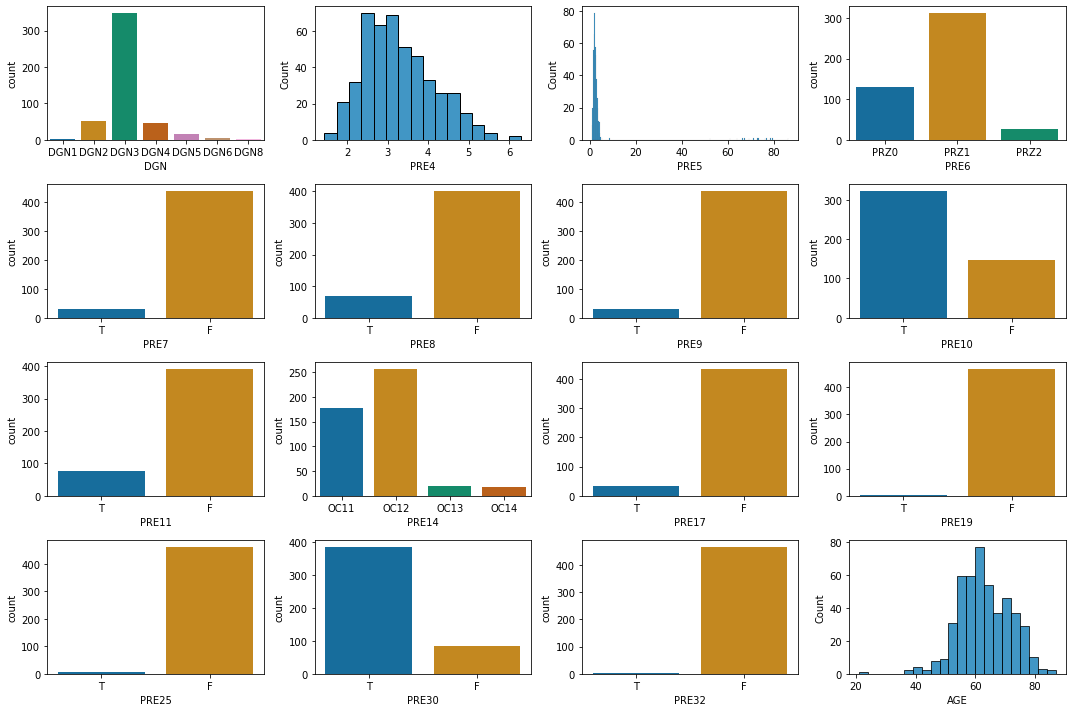

In [43]:
# Create the figure and axes with 4 rows and 4 columns
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,10))

# Set a colour palette
sns.set_palette("colorblind")

# Create the plots, informing the coordinate
sns.countplot(x='DGN', data=df, ax=axes[0, 0], order=DGN)
sns.histplot(x='PRE4', data=df, ax=axes[0, 1])
sns.histplot(x='PRE5', data=df, ax=axes[0, 2])
sns.countplot(x='PRE6', data=df, ax=axes[0, 3], order=PRZ)

sns.countplot(x='PRE7', data=df, ax=axes[1, 0], order=binary)
sns.countplot(x='PRE8', data=df, ax=axes[1, 1], order=binary)
sns.countplot(x='PRE9', data=df, ax=axes[1, 2], order=binary)
sns.countplot(x='PRE10', data=df, ax=axes[1, 3], order=binary)

sns.countplot(x='PRE11', data=df, ax=axes[2, 0], order=binary)
sns.countplot(x='PRE14', data=df, ax=axes[2, 1], order=OC)
sns.countplot(x='PRE17', data=df, ax=axes[2, 2], order=binary)
sns.countplot(x='PRE19', data=df, ax=axes[2, 3], order=binary)

sns.countplot(x='PRE25', data=df, ax=axes[3, 0], order=binary)
sns.countplot(x='PRE30', data=df, ax=axes[3, 1], order=binary)
sns.countplot(x='PRE32', data=df, ax=axes[3, 2], order=binary)
sns.histplot(x='AGE', data=df, ax=axes[3, 3])


# Tidy the figure layout
plt.tight_layout()

From the visualisation, we can see that most of the binary categorical features have dominating modes. From the numerical features, `PRE5` stands out as requiring handling strategies for outliers.

* `DGN`: `DGN3` is the mode followed by `DGN2`.
* `PRE4`: Follows a unimodal distribution skewed right.
* `PRE5`: Seems like a unimodal distribution with several high outliers that need to be handled.
* `PRE6`: `PRZ1` is the mode followed by `PRZ0`.
* `PRE7`: `F` dominates the dataset with 93.4%.
* `PRE8`: `F` dominates the dataset with 85.5%.
* `PRE9`: `F` dominates the dataset with 93.4%.
* `PRE10`: `T` is the mode.
* `PRE11`: `F` dominates the dataset with 83.4%.
* `PRE14`: `OC12` is the mode followed by `OC11`.
* `PRE17`: `F` dominates the dataset with 92.6%.
* `PRE19`: `F` dominates the dataset with 92.6%.
* `PRE25`: `F` dominates the dataset with 98.3%.
* `PRE30`: `T` dominates the dataset with 82.1%.
* `PRE32`: `F` dominates the dataset with 99.6%.
* `AGE`: Follows a unimodal distribution skewed left.

We will also visualise the target feature.

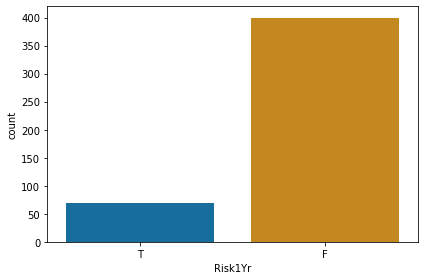

In [44]:
sns.countplot(x='Risk1Yr', data=df, order=boolean)
plt.tight_layout()

`F` dominates the target dataset with 85.1%. We have a moderately imbalanced dataset.

### <a name="2.4"></a>2.4 Data Quality Plan

As we have seen so far, the dataset does not have any missing values or irregular cardinality problems.  
  
For the data quality plan, we will take a closer look at the outliers in `PRE5`. The data recorded here, FEV1, is a parameter of spirometry. As we can see in the graph below[[3]](#C3), normal values for FEV1 for adults are roughly between 2 and 4.6. It is unlikely that the maximum value of 86.3 and other higher values we can see from the visualisation are representative of human lung capacity. We will use a clamp transformation to handle these values, since the visualisation shows a unimodal distribution around normal values for FEV1.

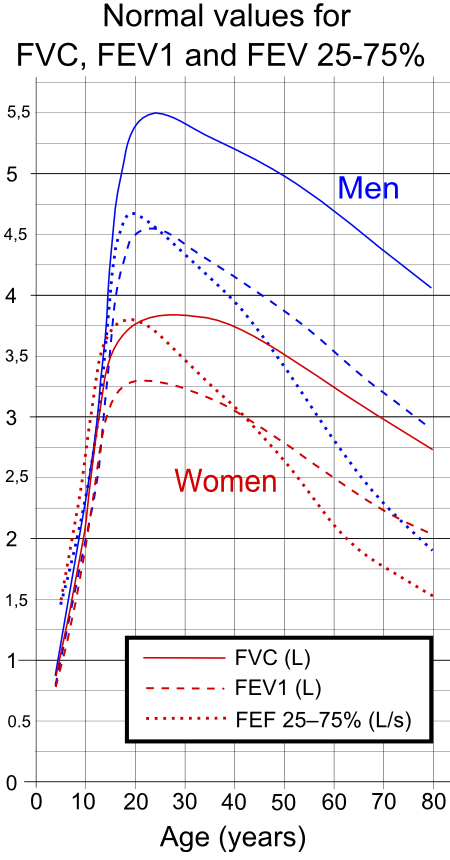

In [47]:
display.Image("https://upload.wikimedia.org/wikipedia/commons/3/39/Normal_values_for_FVC%2C_FEV1_and_FEF_25-75.png", width = 225, height = 430)

### <a name="2.5"></a>2.5 Handling Strategies for the Data Quality Issues

|Feature|Data Quality Issue|Potential Handling Strategies|
|:----------- |:----------- |:----------- |
| PRE5 | Outliers (high)| Clamp transformation (manual: 0, 4.76) |

We will calculate clamp threshold as the 3rd quartile plus 1.5 times the inter-quartile range.  
  
$upper = 3.08 + 1.5 × 1.12 = 4.76$ 
  
The threashold of 4.76 fits the normal values of FEV1 shown in above graph. The upper clamp threshold could also be calculated as the mean value of a feature plus 2 times the standard deviation, but we will not use this calculation since both mean and standard deviation of `PRE5` are affected by the outliers.

The lower threshold can be 0 since lung cancer patients may have very low lung capacity, but will not have a negative FEV1 value.

## <a name="S3"></a>Section 3: The Evaluation

### <a name="3.1"></a>3.1 Types of Experiments

The dataset from `ThoraricSurgery.arff` has 470 instances. We will use k-fold cross validation with $k=5$.

We will not be using hold-out sampling, since we do not have a very large dataset. Leave-one-out cross validation and bootstrapping cross validation have also been ruled out since they are both methods best used for very small datasets (less than 300 for bootstrapping). The dataset does not include a time dimension, so we will not use out-of-time sampling.

We would like to keep the value of k between 3 and 8 to avoid repetition in the experiment. $k=5$ has been chosen since the dataset size of 470 is divisible by 5.

### <a name="3.2"></a>3.2 Relevant Metrics

To measure the performance of each fold, we will use a confusion matrix with average class accuracy based on a harmonic mean for both of the proposed solutions.

Since we have a binary target feature of `T` or `F`, and a positive prediction (a surgery is likely to lead to death within 1 year) is more important than a negative one, precision, recall, and the F1 measure would seem suitable for evaluation. However, we have a dominant target level of `F` which could make the  performance of the model on `F` level overwhelm the performance on the `T` level in the accuracy calculation. We will use harmonic means when calculating average class accuracy, since arithmetic means can be susceptible to influence of large outliers.

If we are to compare multiple modeling techniques to one in the next part of the assignment, we would also like to use ROC index since ROC curves can be quite robust in the presence of imbalanced data.  

We have ruled out profit matrix since quantifiable profit will not be available for this case.

<a name="C1">[1]</a>: Health Service Executive, <em>Cancer Incidence, Survival and Mortality Data</em>, https://www.hse.ie/eng/services/list/5/cancer/pubs/intelligence/registrydata.html (Accessed 18th March 2022)

<a name="C2">[2]</a>: Nuffield Trust, <em>Cancer Survival Rates</em>,
 https://www.nuffieldtrust.org.uk/resource/cancer-survival-rates#background (Accessed 19th March 2022)
 
<a name="C3">[3]</a>: Wikipedia, <em>Spirometry</em>,
 https://en.wikipedia.org/wiki/Spirometry#/media/File:Normal_values_for_FVC,_FEV1_and_FEF_25-75.png (Accessed 19th March 2022)